## Importing the Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [3]:
df=pd.read_csv('Advertising.csv')

## Basic Data Exploration
### Checking for Central Tendency Measure also called 6 Point Summary

In [11]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [13]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
# Dropping the "Unnamed: 0" column
df1 = df.drop('Unnamed: 0',axis='columns') 

In [5]:
df1.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
df1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## EDA

<strong>
The major steps to be covered for EDA are below: <br>
1.Handle Missing value (Not required no missing data.)<br>
2.Removing duplicates (Not required no duplicate data.)<br>
3.Outlier Treatment<br>
4.Normalizing and Scaling( Numerical Variables) (Not Required) <br>
5.Encoding Categorical variables( Dummy Variables) (Not Required)<br>
6.Bivariate Analysis
</strong>

### 2.Removing duplicates

In [23]:
# checking for duplicates.
duplicate_rows = df1[df1.duplicated()]

In [24]:
duplicate_rows

,TV,Radio,Newspaper,Sales


### 3.Outlier Treatment

##### Making a boxplot to check for outliers

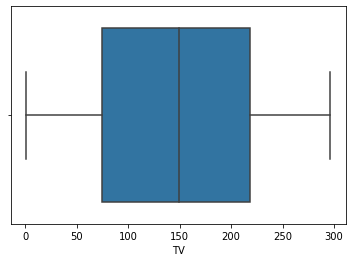

In [31]:
# Plotting a box plot to check the outliers.
sns.boxplot(df1['TV'])
plt.show()

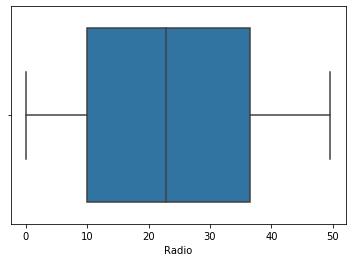

In [28]:
# Plotting a box plot to check the outliers.
sns.boxplot(df1['Radio'])
plt.show()

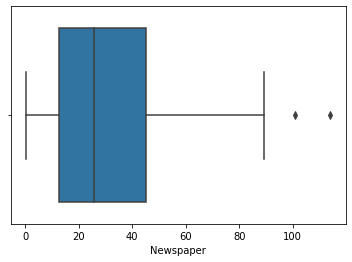

In [29]:
# Plotting a box plot to check the outliers.
sns.boxplot(df1['Newspaper'])
plt.show()

In [32]:
# Removal of Outliers for the Newspaper column.
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TV           144.450
Radio         26.550
Newspaper     32.350
Sales          7.025
dtype: float64


In [36]:
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(198, 4)

### Checking for multicollinearity

## Using VIF

<strong> VIF value is not very High so Linear Regression can be used.

In [37]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [38]:
X = df2.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


### Checking for corrrelation using Heat Map
## Heat Map can also be used for Multivariate analysis

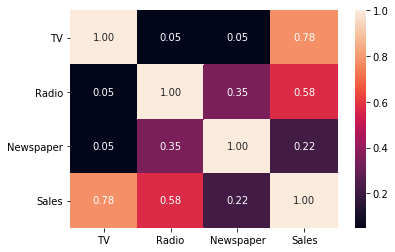

In [39]:
sns.heatmap(df2.corr(), annot = True , fmt=".2f")
plt.show()

In [6]:
x = df1[['TV','Radio','Newspaper']]
y = df1['Sales']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.046517
Radio,0.187398
Newspaper,0.001554


### Bivariate Analysis.

Text(0, 0.5, 'Radio')

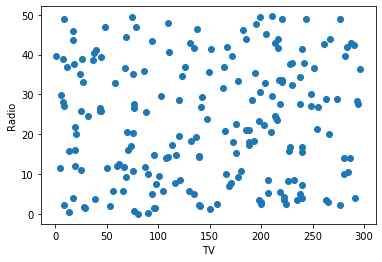

In [42]:
plt.scatter(df['TV'],df['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

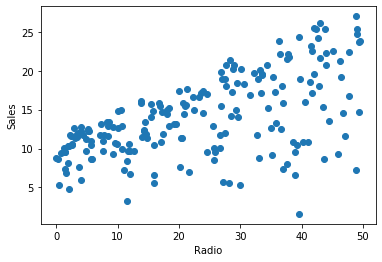

In [43]:
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel("Radio")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

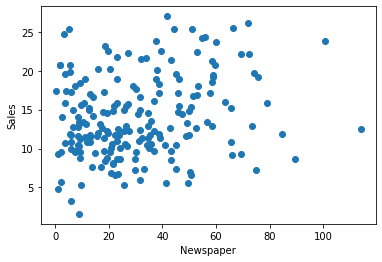

In [44]:
plt.scatter(df['Newspaper'],df['Sales'])
plt.xlabel("Newspaper")
plt.ylabel("Sales")